# Demo Notebook for Metrics Correlation Model Testing

#### [Download notebook](https://github.com/opensearch-project/opensearch-py-ml/blob/main/docs/source/examples/demo_metrics_correlation.ipynb)


## Introduction

This notebook introduces the technique of metrics correlation using ML Commons API.

## Step 0: Imports

Please install the following packages from the terminal if you haven't already. They can be also installed from the notebook by uncommenting the line and execute.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# !pip install pandas matplotlib numpy opensearch-py

In [3]:
# import this to stop opensearch-py-ml from yelling every time a DataFrame connection made
import warnings
warnings.filterwarnings('ignore')

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import opensearch_py_ml as oml
from opensearchpy import OpenSearch

# Import standard test settings for consistent results
from opensearch_py_ml.conftest import *

## Step 1: Set up clients and define helper functions


In [5]:
CLUSTER_URL = 'https://localhost:9200'

def get_os_client(cluster_url = CLUSTER_URL,
                  username='admin',
                  password='admin'):
    """
    Get OpenSearch client
    :param cluster_url: cluster URL like https://ml-te-netwo-1s12ba42br23v-ff1736fa7db98ff2.elb.us-west-2.amazonaws.com:443
    :return: OpenSearch client
    """
    client = OpenSearch(
        hosts=[cluster_url],
        http_auth=(username, password),
        verify_certs=False,
        timeout = 30
    )
    return client


In [6]:
client = get_os_client()

In [7]:
#connect to ml_common client with OpenSearch client
from opensearch_py_ml.ml_commons import MLCommonClient
ml_client = MLCommonClient(client)

## Step 2: Preparing data


In [8]:
# Reading csv files as a dataframes
df_pd = pd.read_csv("data/SMD_small.csv.zip", header=None, index_col=None)
Y = pd.read_csv("data/SMD_small_labels.csv.zip", header=None, index_col=None)

There are 100 rows and 38 columns in the dataset. Each row represents a certain time point, while each columns represents a metric. This is a regular time series dataset.

In [9]:
df_pd

,0,1,...,36,37
0,0.096774,0.088983,...,0.0,0.0
1,0.107527,0.062500,...,0.0,0.0
2,0.107527,0.104873,...,0.0,0.0
3,0.096774,0.123941,...,0.0,0.0
4,0.096774,0.070975,...,0.0,0.0
...,...,...,...,...,...
95,0.494624,0.072034,...,0.0,0.0
96,0.494624,0.127119,...,0.0,0.0
97,0.494624,0.069915,...,0.0,0.0
98,0.494624,0.046610,...,0.0,0.0


However, to use this dataset for metrics correlation later, each row needs to represent a metric. Therefore, we need to transpose it before using it for inference.

In [10]:
df_pd_transposed = df_pd.transpose()
df_pd_transposed

,0,1,...,98,99
0,0.096774,0.107527,...,0.494624,0.494624
1,0.088983,0.062500,...,0.046610,0.052966
2,0.090301,0.081382,...,0.060201,0.059086
3,0.102207,0.097561,...,0.052265,0.052265
4,0.000000,0.000000,...,0.000000,0.000000
...,...,...,...,...,...
33,0.000022,0.000034,...,0.000034,0.000022
34,0.102150,0.103308,...,0.047709,0.052994
35,0.102143,0.103301,...,0.047705,0.052990
36,0.000000,0.000000,...,0.000000,0.000000


## Step 3: Metrics correlation


In [11]:
input_json = {"metrics": df_pd_transposed.values.tolist()}

In [12]:
input_json

{'metrics': [[0.096774,
   0.107527,
   0.107527,
   0.096774,
   0.096774,
   0.096774,
   0.096774,
   0.096774,
   0.096774,
   0.096774,
   0.096774,
   0.096774,
   0.096774,
   0.096774,
   0.096774,
   0.096774,
   0.096774,
   0.096774,
   0.086022,
   0.086022,
   0.086022,
   0.086022,
   0.086022,
   0.086022,
   0.086022,
   0.086022,
   0.086022,
   0.086022,
   0.086022,
   0.086022,
   0.086022,
   0.086022,
   0.075269,
   0.075269,
   0.086022,
   0.075269,
   0.075269,
   0.075269,
   0.075269,
   0.075269,
   0.075269,
   0.075269,
   0.075269,
   0.064516,
   0.064516,
   0.064516,
   0.075269,
   0.075269,
   0.075269,
   0.064516,
   0.064516,
   0.064516,
   0.064516,
   0.064516,
   0.064516,
   0.064516,
   0.064516,
   0.064516,
   0.064516,
   0.053763,
   0.064516,
   0.064516,
   0.053763,
   0.064516,
   0.064516,
   0.053763,
   0.053763,
   0.053763,
   0.053763,
   0.053763,
   0.053763,
   0.064516,
   0.053763,
   0.053763,
   0.053763,
   0.053763,
 

In [13]:
results = ml_client.execute(
    algorithm_name = "METRICS_CORRELATION",
    input_json = input_json
)
results


{'function_name': 'METRICS_CORRELATION',
 'output': {'inference_results': [{'event_window': [2.0, 94.0],
    'event_pattern': [0.16287264,
     0.17291106,
     0.16507792,
     0.1442258,
     0.11990739,
     0.09729371,
     0.080975406,
     0.07199166,
     0.06942996,
     0.07270404,
     0.08256501,
     0.100012146,
     0.12396885,
     0.14978407,
     0.17256345,
     0.18076059,
     0.17145823,
     0.14817578,
     0.12038868,
     0.09797779,
     0.089608796,
     0.09555778,
     0.11185065,
     0.13050617,
     0.14417148,
     0.14867567,
     0.14488967,
     0.13812506,
     0.13548654,
     0.14443183,
     0.16681649,
     0.20366035,
     0.25175166,
     0.31876424,
     0.38990238,
     0.4533083,
     0.5011735,
     0.5278964,
     0.5301469,
     0.5062882,
     0.45027423,
     0.44566932,
     0.4209668,
     0.38853073,
     0.35869414,
     0.3340214,
     0.31001407,
     0.28004804,
     0.24047177,
     0.19322383,
     0.15334728,
     0.11692942,

## Step 4: Result visualization


Text(0.5, 1.0, 'All metrics')

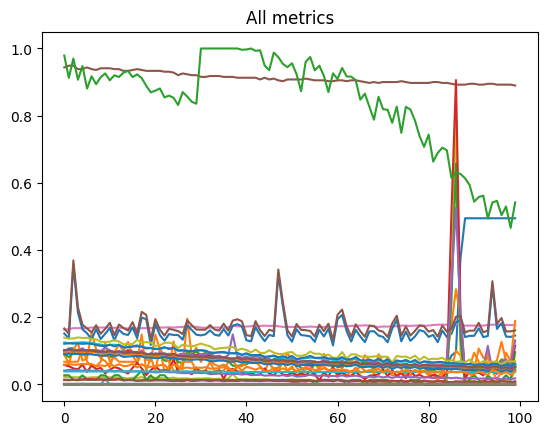

In [33]:
plt.plot(df_pd)
plt.title("All metrics")

In [21]:
results = results["output"]["inference_results"][0]
results

In [36]:
x1, x2 = results["event_window"]
suspected_metrics = results["suspected_metrics"]

Text(0.5, 1.0, 'Suspected metrics and anomaly')

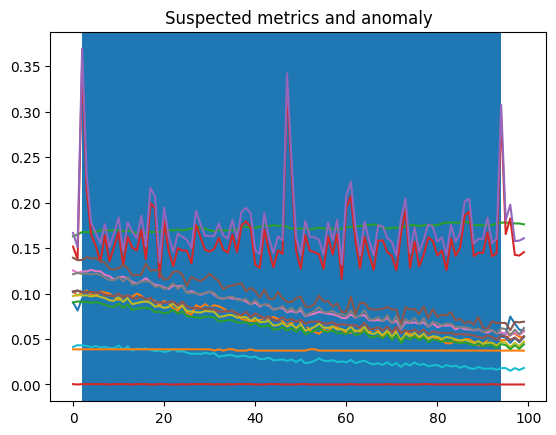

In [38]:
plt.plot(df_pd[suspected_metrics])
plt.axvspan(x1, x2)
plt.title("Suspected metrics and anomaly")

The event window is highlighted in blue
